In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator # Image augmentation
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recogniser-train/train.csv
/kaggle/input/digit-recogniser/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/digit-recogniser-train/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


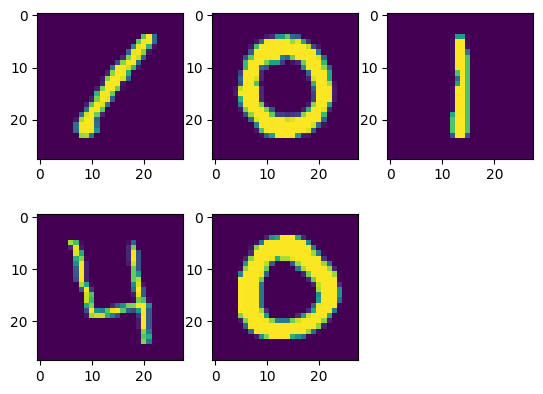

In [3]:
# Extracting first 5 columns
picture_test=train.copy().head(5).drop(columns='label')  
# Reshaping dataframe from numpy to fit the plotting requirements
p_test=np.array(picture_test).reshape(-1,28,28,1)
# Plotting resulting images
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(p_test[i])

In [4]:
# Training data
train_data = train.drop(columns='label')/255

# Labels for training
train_label = train["label"]

In [5]:
# Model development

datagen = ImageDataGenerator(rotation_range = 5, #Degree from random rotations
                            zoom_range = 0.1, width_shift_range=0.05, #Fraction of total width
                            height_shift_range = 0.05 #Fraction of total height
)

In [6]:
# Finding the mean of the data
X_mean = np.array(train_data).reshape(-1, 28, 28, 1).mean(axis=0)

# Fitting the current database (Columns and final label) to the ImageDataGenerator object
datagen.fit(np.array(train_data).reshape(-1, 28, 28, 1) - X_mean)

train_gen = datagen.flow(np.array(train_data).reshape(-1, 28, 28, 1),
                        train_label, batch_size = 100)

In [7]:
# Creation of neural network
model = tf.keras.Sequential()

# Image transformation and analysis
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[5,5], activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[5, 5], padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=[2,2], strides = 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

# Final prediction
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compilator
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

# Building of the model with the related input shape
model.build([None, 28, 28, 1])

In [8]:
model.fit(train_gen, epochs=20)

Epoch 1/20
420/420 [==============================] - 123s 289ms/step - loss: 0.1977 - accuracy: 0.9366
Epoch 2/20
420/420 [==============================] - 121s 289ms/step - loss: 0.0631 - accuracy: 0.9814
Epoch 3/20
420/420 [==============================] - 124s 296ms/step - loss: 0.0447 - accuracy: 0.9860
Epoch 4/20
420/420 [==============================] - 122s 291ms/step - loss: 0.0384 - accuracy: 0.9879
Epoch 5/20
420/420 [==============================] - 121s 288ms/step - loss: 0.0323 - accuracy: 0.9895
Epoch 6/20
420/420 [==============================] - 121s 288ms/step - loss: 0.0287 - accuracy: 0.9913
Epoch 7/20
420/420 [==============================] - 121s 287ms/step - loss: 0.0262 - accuracy: 0.9915
Epoch 8/20
420/420 [==============================] - 120s 286ms/step - loss: 0.0236 - accuracy: 0.9929
Epoch 9/20
420/420 [==============================] - 120s 284ms/step - loss: 0.0218 - accuracy: 0.9933
Epoch 10/20
420/420 [==============================] - 120s 286m

In [9]:
test= pd.read_csv("/kaggle/input/digit-recogniser/test.csv")/255

In [10]:
# Prediction
predictions = model.predict(tf.reshape(test, [-1, 28, 28, 1]))

# Change to relate the results to the exact integer
predictions = tf.math.argmax(predictions, axis = -1)

# Passing information to dataframe
predictions = pd.Series(predictions, name='Label')

# Labels of images (Ids)
image_id = pd.Series(range(1,28001), name = 'ImageId')

# Final Dataframe and CSV submission
predictions = pd.concat([image_id, predictions], axis = 1)
predictions.to_csv('submission.csv', index=False)

875/875 [==============================] - 22s 25ms/step
